In [3]:
import time
import numpy as np
import xgboost as xgb
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [4]:
# Load MNIST 
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"].astype(int)

# Normalize pixel values (0–255 → 0–1)
X = X / 255.0

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (56000, 784) Test shape: (14000, 784)


In [5]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver="saga", n_jobs=-1, random_state=42),
    "SVM": SVC(kernel="linear", random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42, n_jobs=-1)
}


Training Logistic Regression...
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1381
           1       0.95      0.97      0.96      1575
           2       0.93      0.90      0.91      1398
           3       0.90      0.89      0.89      1428
           4       0.93      0.92      0.93      1365
           5       0.88      0.87      0.88      1263
           6       0.94      0.95      0.94      1375
           7       0.93      0.95      0.94      1459
           8       0.89      0.88      0.89      1365
           9       0.90      0.89      0.90      1391

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000



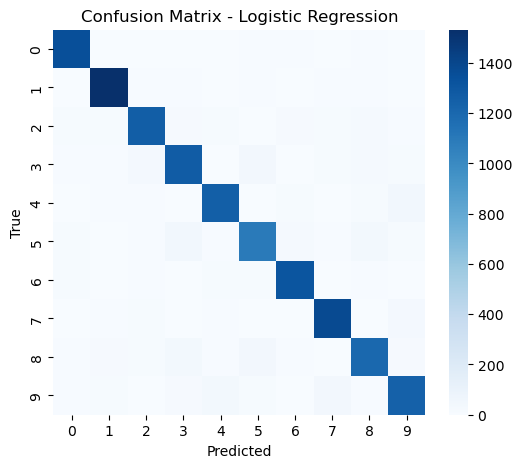


Training SVM...
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1381
           1       0.96      0.98      0.97      1575
           2       0.92      0.93      0.93      1398
           3       0.90      0.92      0.91      1428
           4       0.94      0.94      0.94      1365
           5       0.92      0.90      0.91      1263
           6       0.96      0.96      0.96      1375
           7       0.95      0.95      0.95      1459
           8       0.93      0.89      0.91      1365
           9       0.94      0.90      0.92      1391

    accuracy                           0.94     14000
   macro avg       0.94      0.93      0.93     14000
weighted avg       0.94      0.94      0.94     14000



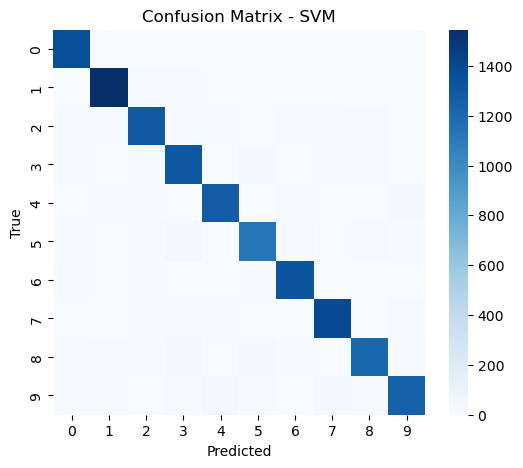


Training Decision Tree...
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1381
           1       0.95      0.96      0.95      1575
           2       0.86      0.85      0.85      1398
           3       0.85      0.84      0.85      1428
           4       0.87      0.87      0.87      1365
           5       0.83      0.83      0.83      1263
           6       0.90      0.89      0.89      1375
           7       0.91      0.91      0.91      1459
           8       0.83      0.81      0.82      1365
           9       0.83      0.83      0.83      1391

    accuracy                           0.87     14000
   macro avg       0.87      0.87      0.87     14000
weighted avg       0.87      0.87      0.87     14000



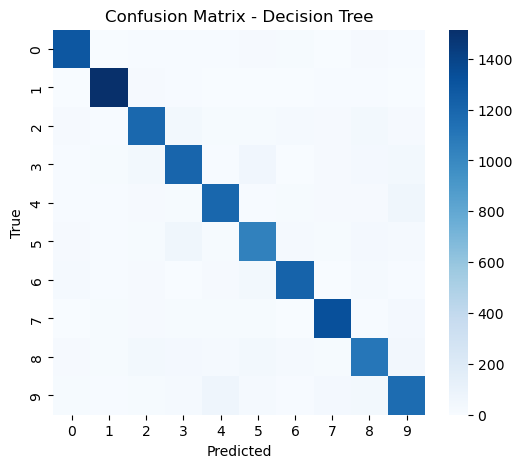


Training Random Forest...
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1381
           1       0.98      0.98      0.98      1575
           2       0.96      0.97      0.97      1398
           3       0.96      0.96      0.96      1428
           4       0.97      0.96      0.96      1365
           5       0.97      0.96      0.96      1263
           6       0.97      0.98      0.98      1375
           7       0.97      0.97      0.97      1459
           8       0.96      0.96      0.96      1365
           9       0.94      0.94      0.94      1391

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



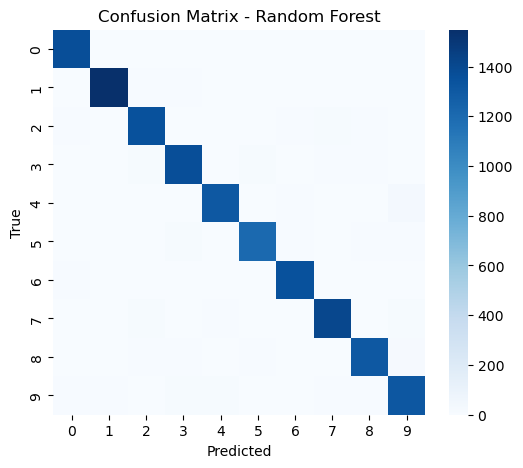


Training XGBoost...


C:\Users\bbuser\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:32:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1381
           1       0.98      0.99      0.99      1575
           2       0.98      0.98      0.98      1398
           3       0.98      0.97      0.97      1428
           4       0.98      0.97      0.97      1365
           5       0.98      0.97      0.98      1263
           6       0.98      0.98      0.98      1375
           7       0.98      0.98      0.98      1459
           8       0.97      0.97      0.97      1365
           9       0.96      0.96      0.96      1391

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000



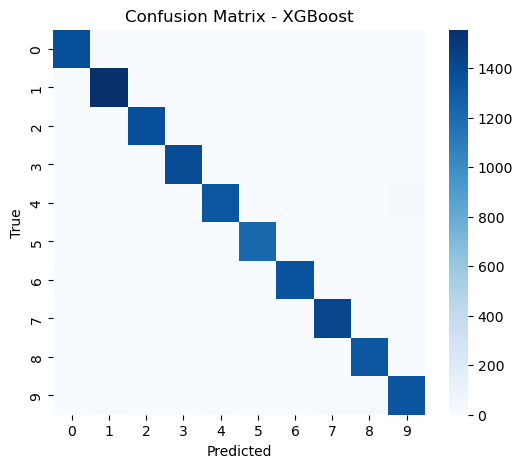

In [6]:
results = []
misclassified_samples = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    start = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start

    # Predictions
    y_pred = model.predict(X_test)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, digits=3, output_dict=True)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": report["weighted avg"]["precision"],
        "Recall": report["weighted avg"]["recall"],
        "F1-score": report["weighted avg"]["f1-score"],
        "Train Time (s)": training_time
    })

    print(classification_report(y_test, y_pred))

    # Save misclassified samples
    incorrect_idx = np.where(y_pred != y_test)[0][:10]
    misclassified_samples[name] = (X_test[incorrect_idx], y_test[incorrect_idx], y_pred[incorrect_idx])

    # Confusion matrix
    plt.figure(figsize=(6, 5))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=False, cmap="Blues", fmt="d")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()


Model Comparison:
                 Model  Accuracy  Precision    Recall  F1-score  \
0  Logistic Regression  0.921643   0.921368  0.921643  0.921426   
1                  SVM  0.935857   0.935784  0.935857  0.935658   
2        Decision Tree  0.874286   0.874005  0.874286  0.874092   
3        Random Forest  0.967214   0.967208  0.967214  0.967189   
4              XGBoost  0.976571   0.976575  0.976571  0.976556   

   Train Time (s)  
0     4324.908335  
1      744.715234  
2       76.822056  
3       27.473338  
4      257.687376  


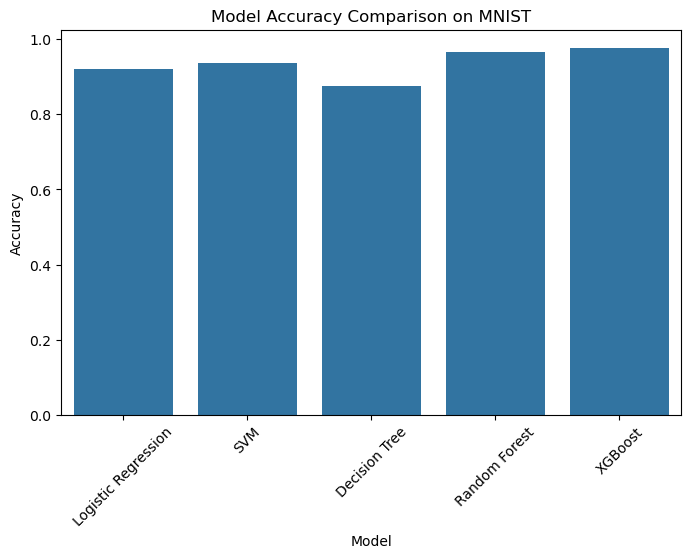

In [7]:
import pandas as pd

results_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(results_df)

# Barplot of accuracy
plt.figure(figsize=(8, 5))
sns.barplot(x="Model", y="Accuracy", data=results_df)
plt.xticks(rotation=45)
plt.title("Model Accuracy Comparison on MNIST")
plt.show()


Misclassified samples from Logistic Regression:


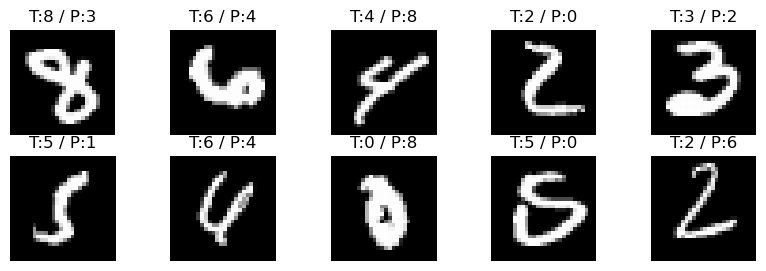


Misclassified samples from SVM:


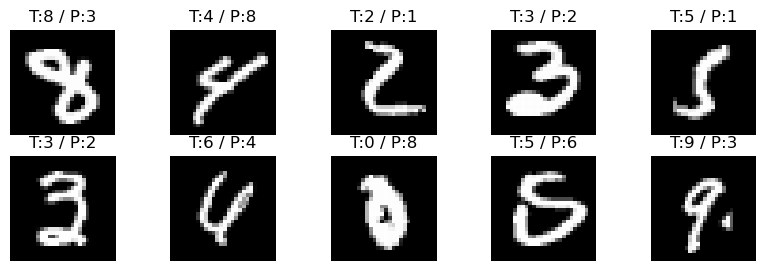


Misclassified samples from Decision Tree:


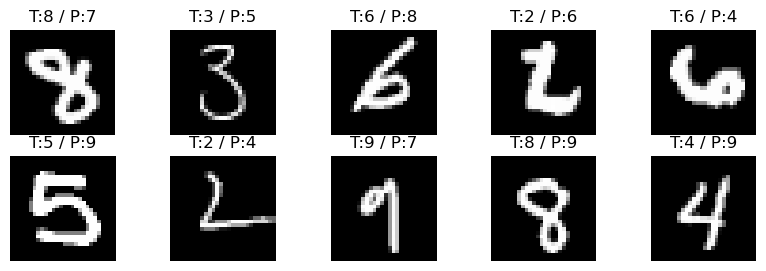


Misclassified samples from Random Forest:


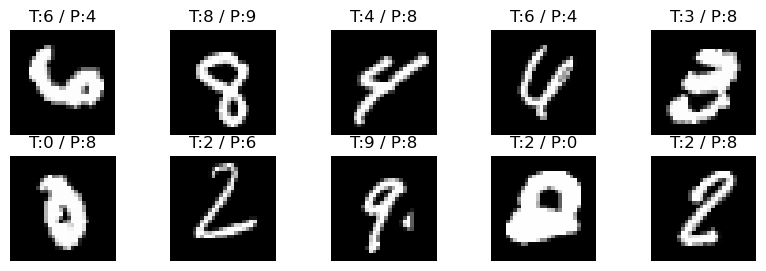


Misclassified samples from XGBoost:


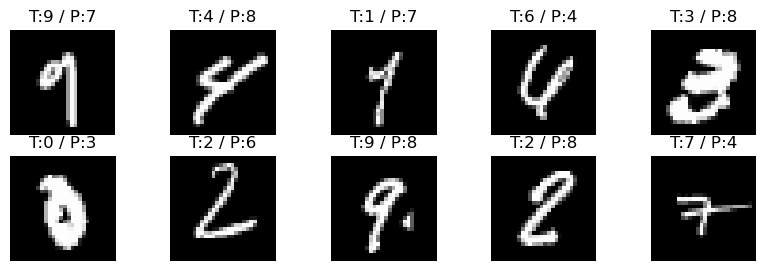

In [8]:
#Error Analysis
for name, (images, true_labels, pred_labels) in misclassified_samples.items():
    print(f"\nMisclassified samples from {name}:")
    plt.figure(figsize=(10, 3))
    for i in range(len(images)):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap="gray")
        plt.title(f"T:{true_labels[i]} / P:{pred_labels[i]}")
        plt.axis("off")
    plt.show()